<a href="https://colab.research.google.com/github/sisomimoctrl/study-tensorflow/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

print(tf.__version__)

2.8.2


In [2]:
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [3]:
print(train_data.shape, test_data.shape)
print(type(train_data), type(test_data))
print(type(train_data[0]), type(test_data[0]))

(60000, 28, 28) (10000, 28, 28)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


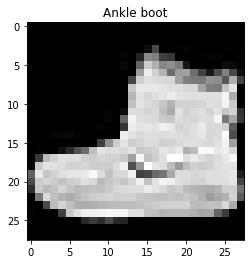

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

import matplotlib.pyplot as plt

plt.imshow(train_data[0], cmap='gray')
plt.title(class_names[train_labels[0]])
plt.show()

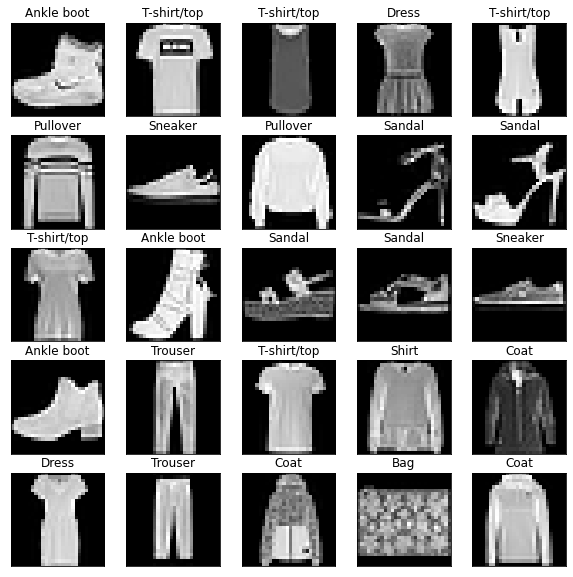

In [5]:


plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, 1+i)
    plt.title(class_names[train_labels[i]])
    plt.imshow(train_data[i], cmap='gray')
    plt.xticks([]), plt.yticks([])

plt.show()

In [6]:
X_train = train_data.reshape(-1, 28*28)
X_train = X_train / 255

X_test = test_data.reshape(-1, 28*28)
X_test = X_test / 255

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [7]:
print(train_labels.shape, test_labels.shape)
print(type(train_labels), type(train_labels))
print(type(train_labels[0]), type(test_labels[0]))
print('train_labels : ', train_labels)

(60000,) (10000,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.uint8'> <class 'numpy.uint8'>
train_labels :  [9 0 0 ... 3 0 5]


In [8]:
from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

one_hot_train_labels.shape, one_hot_test_labels.shape

((60000, 10), (10000, 10))

In [9]:
print(one_hot_train_labels)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(784,)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
X_val = X_train[:1000]
partial_X_train = X_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [13]:
history = model.fit(partial_X_train, 
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_val, y_val))

Epoch 1/20
116/116 [==============================] - 3s 9ms/step - loss: 0.7103 - accuracy: 0.7452 - val_loss: 0.5423 - val_accuracy: 0.8060
Epoch 2/20
116/116 [==============================] - 1s 7ms/step - loss: 0.4603 - accuracy: 0.8319 - val_loss: 0.3758 - val_accuracy: 0.8660
Epoch 3/20
116/116 [==============================] - 1s 7ms/step - loss: 0.4011 - accuracy: 0.8507 - val_loss: 0.4790 - val_accuracy: 0.8240
Epoch 4/20
116/116 [==============================] - 1s 6ms/step - loss: 0.3614 - accuracy: 0.8654 - val_loss: 0.4449 - val_accuracy: 0.8350
Epoch 5/20
116/116 [==============================] - 1s 7ms/step - loss: 0.3357 - accuracy: 0.8747 - val_loss: 0.4328 - val_accuracy: 0.8120
Epoch 6/20
116/116 [==============================] - 1s 7ms/step - loss: 0.3157 - accuracy: 0.8815 - val_loss: 0.3176 - val_accuracy: 0.8800
Epoch 7/20
116/116 [==============================] - 1s 8ms/step - loss: 0.2982 - accuracy: 0.8876 - val_loss: 0.3343 - val_accuracy: 0.8770
Epoch 

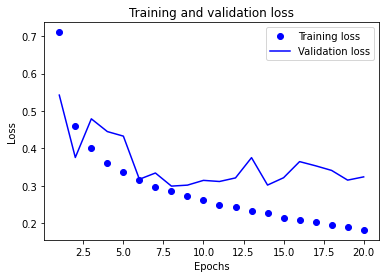

In [14]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

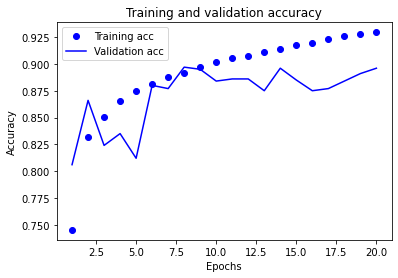

In [15]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [16]:
scores = model.evaluate(X_test, one_hot_test_labels)
print(f'{model.metrics_names[1]} : {scores[1]*100:.2f} %')

313/313 [==============================] - 1s 3ms/step - loss: 0.3773 - accuracy: 0.8831
accuracy : 88.31 %


In [17]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

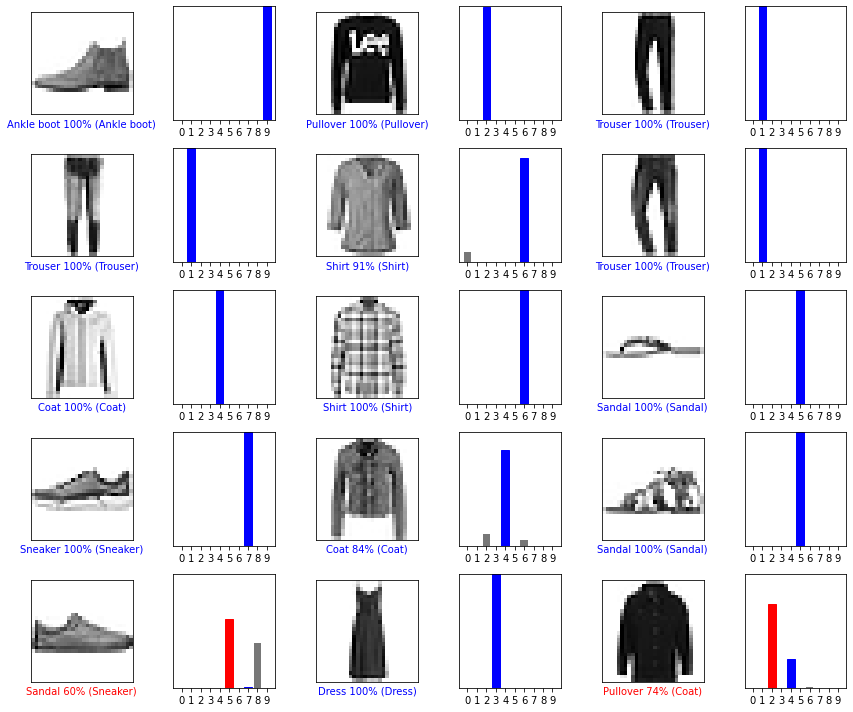

In [18]:
import numpy as np

predictions = model.predict(X_test)

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_data)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()